Reference : https://course.spacy.io/en/chapter3

Welcome back! This chapter is dedicated to processing pipelines: a series of functions applied to a doc to add attributes like part-of-speech tags, dependency labels or named entities.

In this lesson, you'll learn about the pipeline components provided by spaCy, and what happens behind the scenes when you call nlp on a string of text.

### Section 1 : Processing Pipelines

__What happens when you call nlp?__

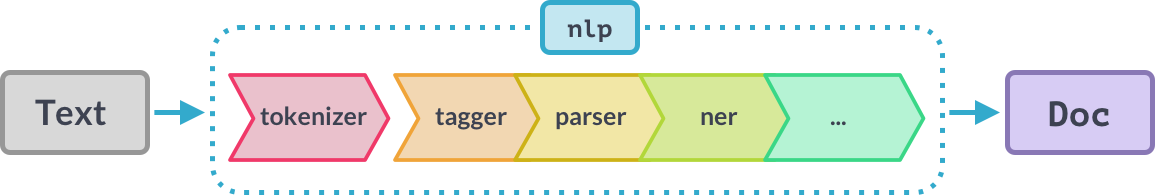

You've already written this plenty of times by now: pass a string of text to the nlp object, and receive a Doc object.

But what does the nlp object actually do?

First, the tokenizer is applied to turn the string of text into a Doc object. Next, a series of pipeline components is applied to the doc in order. In this case, the tagger, then the parser, then the entity recognizer. Finally, the processed doc is returned, so you can work with it.

### Built in pipeline components: 

| Name        | Description            | Create                                           |
| :---------- |:----------------------:|:------------------------------------------------:|
| tagger      | Part-of-speech tagger  |Token.tag, Token.pos |
| parser      | Dependency parser|Toekn.dep, Token.head, Doc.sents, Doc.noun_chunks |
| ner     | Named entity recognizer        |Doc.ents, Token.ent_iob, Token.ent_type  |
| textcat     | Text Classifier        |Doc.cats                                          |

spaCy ships with a variety of built-in pipeline components. Here are some of the most common ones that you'll want to use in your projects.

The part-of-speech tagger sets the token.tag and token.pos attributes.

The dependency parser adds the token.dep and token.head attributes and is also responsible for detecting sentences and base noun phrases, also known as noun chunks.

The named entity recognizer adds the detected entities to the doc.ents property. It also sets entity type attributes on the tokens that indicate if a token is part of an entity or not.

Finally, the text classifier sets category labels that apply to the whole text, and adds them to the doc.cats property.

Because text categories are always very specific, the text classifier is not included in any of the trained pipelines by default. But you can use it to train your own system.

__Under the Hood__

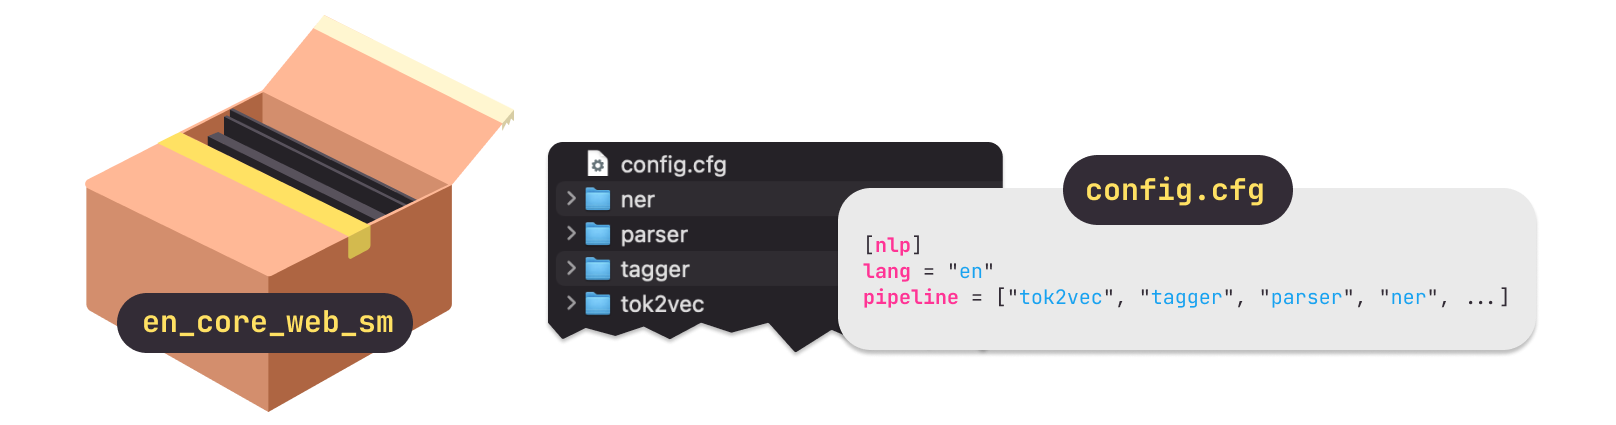

1. Pipeline defined in model's config.cfg in order
2. Built-in components need binary data to make predictions

All pipeline packages you can load into spaCy include several files and a config.cfg.

The config defines things like the language and pipeline. This tells spaCy which components to instantiate and how they should be configured.

The built-in components that make predictions also need binary data. The data is included in the pipeline package and loaded into the component when you load the pipeline.

In [2]:
# C3 - E3

import spacy

# Load the en_core_web_sm pipeline
nlp = spacy.load("en_core_web_sm")

# Print the names of the pipeline components
print(nlp.pipe_names)

# Print the full pipeline of (name, component) tuples
print(nlp.pipeline)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x000001F994D8BD00>), ('tagger', <spacy.pipeline.tagger.Tagger object at 0x000001F994D8B700>), ('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x000001F994C2B220>), ('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x000001F994F7B440>), ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer object at 0x000001F994DE4B80>), ('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x000001F994C2B450>)]


### Section 2 : Custom Pipeline Components 

Now that you know how spaCy's pipeline works, let's take a look at another very powerful feature: custom pipeline components.

Custom pipeline components let you add your own function to the spaCy pipeline that is executed when you call the nlp object on a text – for example, to modify the doc and add more data to it.

__Why Custom Components?__
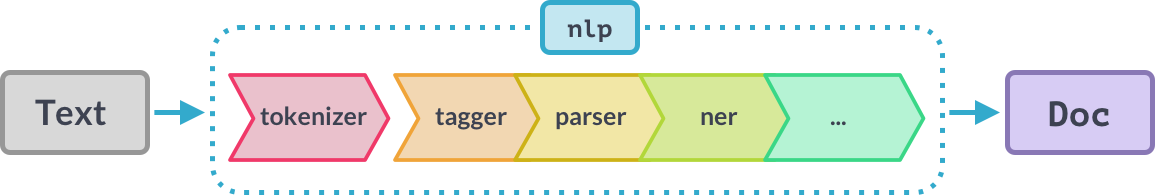

1. Make a function execute automatically when you call nlp
2. Add your own metadata to documents and tokens
3. Updating built-in attributes like doc.ents

After the text is tokenized and a Doc object has been created, pipeline components are applied in order. spaCy supports a range of built-in components, but also lets you define your own.

Custom components are executed automatically when you call the nlp object on a text.

They're especially useful for adding your own custom metadata to documents and tokens.

You can also use them to update built-in attributes, like the named entity spans.

__Anatomy of a Component__

1. Function that takes a doc, modifies it and returns it
2. Registered using the Language.component decorator
3. Can be added using the nlp.add_pipe method

In [3]:
from spacy.language import Language

@Language.component("custom_component")
def custom_component_function(doc):
    # Do something to the doc here
    return doc

nlp.add_pipe("custom_component")

<function __main__.custom_component_function(doc)>

Fundamentally, a pipeline component is a function or callable that takes a doc, modifies it and returns it, so it can be processed by the next component in the pipeline.

To tell spaCy where to find your custom component and how it should be called, you can decorate it using the @Language.component decorator. Just add it to the line right above the function definition.

Once a component is registered, it can be added to the pipeline using the nlp.add_pipe method. The method takes at least one argument: the string name of the component.

|Argument |	Description|	Example|
| :---------- | :-------------: | :---------------------: |
| last |If True, add last|	nlp.add_pipe("component", last=True)|
| first	|If True, add first|	nlp.add_pipe("component", first=True)|
| before	|Add before component|  nlp.add_pipe("component", before="ner")|
| after 	|Add after component|	nlp.add_pipe("component", after="tagger")|

To specify where to add the component in the pipeline, you can use the following keyword arguments:

Setting last to True will add the component last in the pipeline. This is the default behavior.

Setting first to True will add the component first in the pipeline, right after the tokenizer.

The before and after arguments let you define the name of an existing component to add the new component before or after. For example, before="ner" will add it before the named entity recognizer.

The other component to add the new component before or after needs to exist, though – otherwise, spaCy will raise an error.

__Example: A Simple Component__

Here's an example of a simple pipeline component.

We start off with the small English pipeline.

We then define the component – a function that takes a Doc object and returns it.

Let's do something simple and print the length of the doc that passes through the pipeline.

Don't forget to return the doc so it can be processed by the next component in the pipeline! The doc created by the tokenizer is passed through all components, so it's important that they all return the modified doc.

To tell spaCy about the new component, we register it using the @Language.component decorator and call it "custom_component".

We can now add the component to the pipeline. Let's add it to the very beginning right after the tokenizer by setting first=True.

When we print the pipeline component names, the custom component now shows up at the start. This means it will be applied first when we process a doc.

In [4]:
# Create the nlp object
nlp = spacy.load("en_core_web_sm")

# Define a custom component
@Language.component("custom_component")
def custom_component_function(doc):
    # Print the doc's length
    print("Doc length:", len(doc))
    # Return the doc object
    return doc

# Add the component first in the pipeline
nlp.add_pipe("custom_component", first=True)

# Print the pipeline component names
print("Pipeline:", nlp.pipe_names)


Pipeline: ['custom_component', 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


Now when we process a text using the nlp object, the custom component will be applied to the doc and the length of the document will be printed.

In [5]:
# Create the nlp object
nlp = spacy.load("en_core_web_sm")

# Define a custom component
@Language.component("custom_component")
def custom_component_function(doc):
    # Print the doc's length
    print("Doc length:", len(doc))
    # Return the doc object
    return doc

# Add the component first in the pipeline
nlp.add_pipe("custom_component", first=True)

# Process a text
doc = nlp("Hello world!")

Doc length: 3


In [6]:
# C3 - E6
import spacy
from spacy.language import Language

# Define the custom component
@Language.component("length_component")
def length_component_function(doc):
    # Get the doc's length
    doc_length = len(doc)
    print(f"This document is {doc_length} tokens long.")
    # Return the doc
    return doc


# Load the small English pipeline
nlp = spacy.load("en_core_web_sm")

# Add the component first in the pipeline and print the pipe names
nlp.add_pipe("length_component", first=True)
print(nlp.pipe_names)

# Process a text
doc = nlp("This is a sentence.")

['length_component', 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
This document is 5 tokens long.


In [7]:
# C3 - E7

import spacy
from spacy.language import Language
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")
animals = ["Golden Retriever", "cat", "turtle", "Rattus norvegicus"]
animal_patterns = list(nlp.pipe(animals))
print("animal_patterns:", animal_patterns)
matcher = PhraseMatcher(nlp.vocab)
matcher.add("ANIMAL", animal_patterns)

# Define the custom component
@Language.component("animal_component")
def animal_component_function(doc):
    # Apply the matcher to the doc
    matches = matcher(doc)
    # Create a Span for each match and assign the label "ANIMAL"
    spans = [Span(doc, start, end, label="ANIMAL") for match_id, start, end in matches]
    # Overwrite the doc.ents with the matched spans
    doc.ents = spans
    return doc


# Add the component to the pipeline after the "ner" component
nlp.add_pipe("animal_component", after="ner")
print(nlp.pipe_names)

# Process the text and print the text and label for the doc.ents
doc = nlp("I have a cat and a Golden Retriever")
print([(ent.text, ent.label_) for ent in doc.ents])

animal_patterns: [Golden Retriever, cat, turtle, Rattus norvegicus]
['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'animal_component']
[('cat', 'ANIMAL'), ('Golden Retriever', 'ANIMAL')]


### Section 3 : Extension Attributes